
# 🛒 2019 Sales Data Analysis

Bu proje, 2019 yılına ait bir e-ticaret firmasının satış verilerinin analizini içermektedir. 
Amaç, satışların zamansal dağılımını, şehir bazlı ürün tercihlerindeki farklılıkları ve en çok satılan ürünleri belirlemektir.

---

## 📂 Veri Seti Hakkında
Veri seti, bir e-ticaret firmasının **2019 yılındaki 12 aylık sipariş bilgilerini** barındırmaktadır.

**Değişkenler:**
- **Order ID**: Siparişlerin ID numarası  
- **Product**: Siparişlerde yer alan ürünler  
- **Quantity Ordered**: Sipariş edilen ürün adedi  
- **Price Each**: Ürünün adet fiyatı  
- **Order Date**: Sipariş tarihi  
- **Purchase Address**: Siparişin verildiği adres  

---

## 🔧 Kullanılan Kütüphaneler
- **pandas**: Veri manipülasyonu  
- **numpy**: Sayısal işlemler  
- **matplotlib / seaborn**: Veri görselleştirme  
- **itertools / collections**: Kombinasyon analizleri  


## Sales Data 

**Veri Seti Hakkında**: Bu veri seti bir e-ticaret firmasının 2019 yılındaki 12 aylık sipariş bilgilerini barındırıyor.  

💸 **Değişkenler**:  
- **Order ID**: Siparişlerin sipariş ID'leri
- **Product**: Siparişlerde yer alan ürünler
- **Quantity Ordered**: Sipariş edilen adet sayısı
- **Price Each**: Siparişteki ürünün adet fiyatı
- **Order Date**: Sipariş tarihi
- **Purchase Address**: Siparişin verildiği adres

### 📚Kullanılacak kütüphaneler

In [1]:
# Interacting With the Operating System
import os
# Data Manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Other
from itertools import combinations
from collections import Counter
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option('display.width', 500)

### 📊 Veri Seti  
https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data

### Verilerin İçe Aktarılması

#### 12 aylık satış verisini tek bir csv dosyası halinde elde edelim. Aynı dizin içerisinde çalışıyoruz bu nedenle dizin belirtmedim.

In [2]:
files = [file for file in os.listdir("Sales_Data")]
files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [3]:
all_months_data = pd.DataFrame() # boş bir data frame oluşturup içini diğer csv dosyaları ile dolduracağım.

In [4]:
for file in files:
    df = pd.read_csv("Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv",  index=False)
# bu döngü her bir dosyayı okuyup all_months_data ile birleştirecek

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.head(10) # oluşturduğum verinin ilk 10 gözlemi

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001"
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035"
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001"
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001"
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001"


### Veri Setine Genel Bakış

In [7]:
def check_df(dataframe, head=5):
    print("📏##################### Shape #####################")
    print(dataframe.shape)
    print("📊##################### Types #####################")
    print(dataframe.dtypes)
    print("🔝##################### Head #####################")
    print(dataframe.head(head))
    print("🔚##################### Tail #####################")
    print(dataframe.tail(head))
    print("📊##################### NA #####################")
    print(dataframe.isnull().sum())
check_df(all_data)

📏##################### Shape #####################
(186850, 6)
📊##################### Types #####################
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object
🔝##################### Head #####################
  Order ID               Product Quantity Ordered Price Each      Order Date                        Purchase Address
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01  136 Church St, New York City, NY 10001
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03     562 2nd St, New York City, NY 10001
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21    277 Main St, New York City, NY 10001
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13     410 6th St, San Francisco, CA 94016
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:3

Veri seti, 186850 gözlem(satır) ve 6 değişken(sütun)den oluşuyor.  
Değişken türleri object olarak gözlemleniyor. İhtiyaç halinde dönüşüm yapılması gerekir.  
Her değişkende 545 adet kayıp gözlem(NA) bulunuyor.

## Veri setindeki bilgiler ışığında aşağıdaki sorulara cevap aranacaktır.

## Question 1: What was the best month for sales? How much earned that month?

⬇**En fazla satış yapılan ayı tespit edebilmek için **"Order Date"** değişkeninden **"Months"** adlı bir değişken türetelim.  
Daha sonrasında **"Price Each"** * **"Quantity Ordered"** değerlerini içeren **"Sales"** adlı bir değişken türetelim.  
Bu sayede bu değişkeni **"Month"** değişkeni bazında sort ederek hangi ay en fazla satış yapıldığına ulaşabiliriz.**⬇

In [8]:
all_data.head()                                             # mm/dd/yy formatında yazılmış!

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [11]:
all_data["Order Date"].str[0:2].head() 

0    12
1    12
2    12
3    12
4    12
Name: Order Date, dtype: object

In [12]:
all_data["Month"] = all_data["Order Date"].str[0:2] # Month adlı bir değişken türetelim.
all_data.head() # öncelikle str'ye çevirdim ve ay kısmına denk gelen ilk 2 haneyi seçtim. Month değişkeni eklendi.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [13]:
# Month değişkenini integera çevirelim.
all_data["Month"] = all_data["Month"].astype("int32") 
# hata verdi. Değişken içerisinde ilk 2 stringi "Or" olan değerler varmış. bunları veriden atalım

ValueError: invalid literal for int() with base 10: 'Or'

In [17]:
temp_data = all_data[all_data["Month"].str[0:2] == "Or"]
temp_data # 355 adet gözlemin month değeri "Or" ile başlıyormuş.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [18]:
all_data = all_data[all_data["Month"].str[0:2] != "Or"]
all_data["Month"] = all_data["Month"].astype("int32") 
# "ValueError: cannot convert float NaN to integer" hatası aldık. NaN değerleri de veriden atalım!

ValueError: cannot convert float NaN to integer

In [19]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how="all")         # how = kısmına 'all' yazarak tüm NA değerleri siliyorum.
all_data.isna().any(axis=1).sum()             # toplam 0 adet NaN değer var.

0

In [20]:
all_data["Month"] = all_data["Month"].astype("int32")
all_data["Month"].dtype # Month değişkeni integer'a çevirildi.

dtype('int32')

In [21]:
# Price Each ve Quantity Ordered değişkenlerini kullanarak "Sales" değişkeni türetelim.
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Sales"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,11.95
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12,99.99
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12,11.96


In [22]:
# Şimdi ay bazında gruplayarak 'groupby ile' sum'ını alacağım.
summed_sales = all_data.groupby("Month").sum() # burada sadece numerik değişkenleri döndürecektir!
summed_sales["Sales"] # Her aya ait total revenue'lar

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

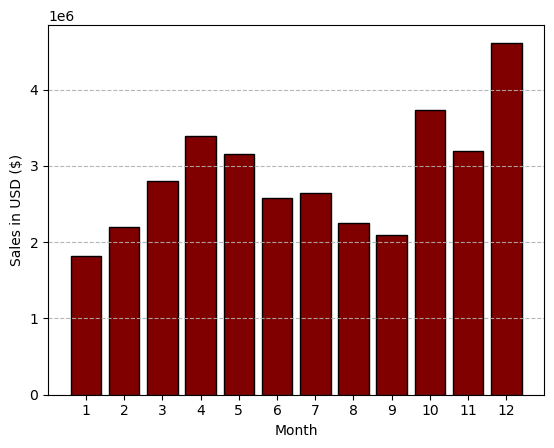

In [23]:
months = range(1,13) # 1'den 12'ye kadar aylara xticks vereceğim
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'], color='maroon', edgecolor='black')
plt.xticks(months)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

### **SONUÇ**: 12. ay 4613443.34$ satış ile en yüksek satışın olduğu ay olmuştur.

## Question 2: What city sold the most product?

**Purchase Address** değişkeninden **"City"** adlı değişken türetip daha önce elde ettiğimiz **Sales** değişkenine göre sıralayabiliriz.

In [24]:
def get_city(address):
    return address.split(",")[1]

#### Şehir isimlerinde benzerlik, karışıklık olmaması için eyalet kodunu da alalım:

In [25]:
def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)}) ")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [26]:
results = all_data.groupby("City").sum() # City değişkenine göre sıralayıp,  şehirlere göre toplam alalım.
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


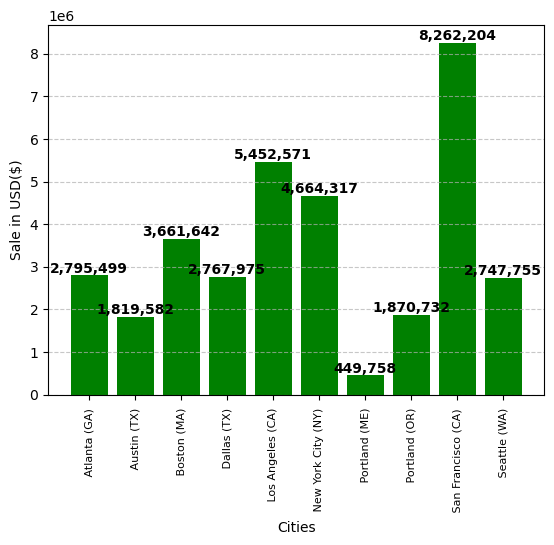

In [27]:
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities, results["Sales"], color = "green")
plt.xticks(cities, rotation = "vertical", size = 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Cities")
plt.ylabel("Sale in USD($)")
# Her çubuğun üzerine değerleri yazdırma
bars = plt.bar(cities, results["Sales"], color = "green")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


Günün hangi saatinde daha çok alışveriş yapıldıysa o saatler içerisinde ürün reklamı yapmak daha mantıklı olacaktır.  
Bunun için saat değişkeni türetip **Sales** değişkenine göre sıralayabiliriz.

In [28]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12


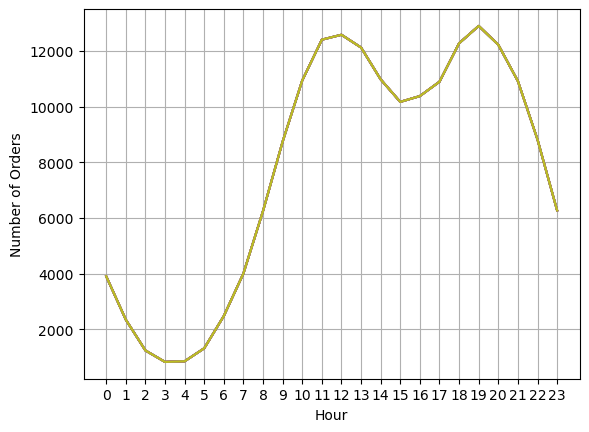

In [29]:
# saat değişkenine göre gruplayıp toplam hesaplatmalıyım:
hours = [hour for hour, df in all_data.groupby("Hour")]
# çizgi grafiği ile daha uygun bir görselleştirme yapmalıyım:
plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()                        # grafiğe ızgara eklemek için.
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.show()

### **SONUÇ**: En çok satışın olduğu saat aralıkları 10.00-12.00 ve 18.00-21.00 saatlerinde reklam vermek mantıklı olacaktır.

## Question 4: What product sold the most? Why do you think it sold the most?


Hangi ürünün en çok satıldığını **Product** değişkenine göre gruplayıp **Quantity Ordered** değişkenine göre toplam alarak bulabiliriz.

In [30]:
# Öncelikle hangi ürünlerin olduğuna göz atalım:
all_data["Product"].unique() # bu ürünler varmış.

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [31]:
# Her bir ürünüe dair satış bilgilerini elde edelim:
product_group = all_data.groupby("Product")
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


Her ürünün satış adetleri

Text(0, 0.5, 'Quantity Ordered')

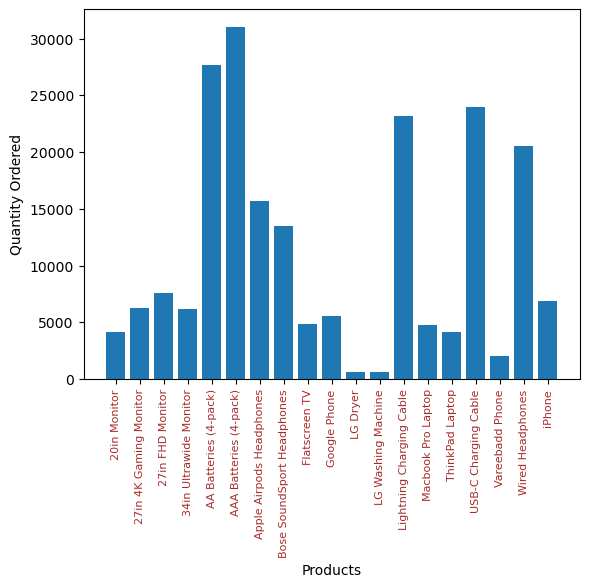

In [32]:
quantity_ordered = product_group["Quantity Ordered"].sum()
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(rotation = "vertical", size = 8, color = "brown")
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")

In [33]:
quantity_ordered = product_group["Quantity Ordered"].sum()
quantity_ordered.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

### SONUÇ: En fazla adette satılan ürün 31017 adet ile *AAA Batteries (4-pack)* olmuştur.  
Ayrıyeten en fazla ciro yapan ürünü de bulalım:

In [34]:
prices = all_data.groupby("Product")["Price Each"].sum()
prices.sort_values(ascending=False)

Product
Macbook Pro Laptop            8030800.00
iPhone                        4789400.00
ThinkPad Laptop               4127958.72
Google Phone                  3315000.00
27in 4K Gaming Monitor        2429637.70
34in Ultrawide Monitor        2348718.19
Apple Airpods Headphones      2332350.00
Flatscreen TV                 1440000.00
Bose SoundSport Headphones    1332366.75
27in FHD Monitor              1125974.93
Vareebadd Phone                826000.00
20in Monitor                   451068.99
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       323787.10
USB-C Charging Cable           261740.85
Wired Headphones               226395.18
AA Batteries (4-pack)           79015.68
AAA Batteries (4-pack)          61716.59
Name: Price Each, dtype: float64

En fazla ciro yapan ürün **8030800.00$** ile **Macbook Pro Laptop** olmuştur!

#### Ürünlerin her birinin fiyatları

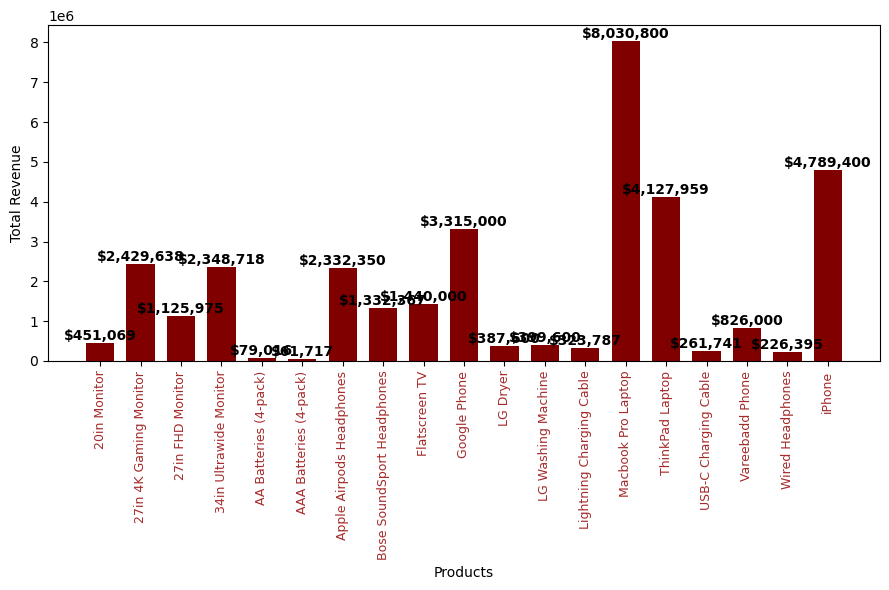

In [35]:
plt.figure(figsize=(9, 6)) # okunaklı olması için grafiği biraz geniş tuttum
bars = plt.bar(products, prices, color="maroon", width=0.7)
plt.xticks(rotation="vertical", size=9, color="brown")
plt.xlabel("Products")
plt.ylabel("Total Revenue")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'${bar.get_height():,.0f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='black')
plt.tight_layout()  
plt.show()

## 6) What are the top 3 most preferred products in each city?



In [36]:
all_data["City"].head(), all_data["Product"].head(), all_data["Quantity Ordered"].head()
# bu değişkenler ile soruya cevap arayabilirim

(0     New York City (NY) 
 1     New York City (NY) 
 2     New York City (NY) 
 3     San Francisco (CA) 
 4           Atlanta (GA) 
 Name: City, dtype: object,
 0      Macbook Pro Laptop
 1      LG Washing Machine
 2    USB-C Charging Cable
 3        27in FHD Monitor
 4    USB-C Charging Cable
 Name: Product, dtype: object,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: Quantity Ordered, dtype: int64)

Şehir ve ürün bazında gruplayıp adet sayısının toplamını almam gerekecek

In [37]:
top_products = all_data.groupby(["City", "Product"])["Quantity Ordered"].sum().reset_index() 
top_products.head()

,City,Product,Quantity Ordered
0,Atlanta (GA),20in Monitor,342
1,Atlanta (GA),27in 4K Gaming Monitor,493
2,Atlanta (GA),27in FHD Monitor,588
3,Atlanta (GA),34in Ultrawide Monitor,482
4,Atlanta (GA),AA Batteries (4-pack),2193


In [38]:
top3_products_by_city = top_products.sort_values(['City', 'Quantity Ordered'], ascending=[True, False])
top3_products_by_city = top3_products_by_city.groupby('City').head(3)
top3_products_by_city

,City,Product,Quantity Ordered
5,Atlanta (GA),AAA Batteries (4-pack),2359
4,Atlanta (GA),AA Batteries (4-pack),2193
15,Atlanta (GA),USB-C Charging Cable,1915
24,Austin (TX),AAA Batteries (4-pack),1668
23,Austin (TX),AA Batteries (4-pack),1424
31,Austin (TX),Lightning Charging Cable,1307
43,Boston (MA),AAA Batteries (4-pack),3461
42,Boston (MA),AA Batteries (4-pack),3016
53,Boston (MA),USB-C Charging Cable,2561
62,Dallas (TX),AAA Batteries (4-pack),2504


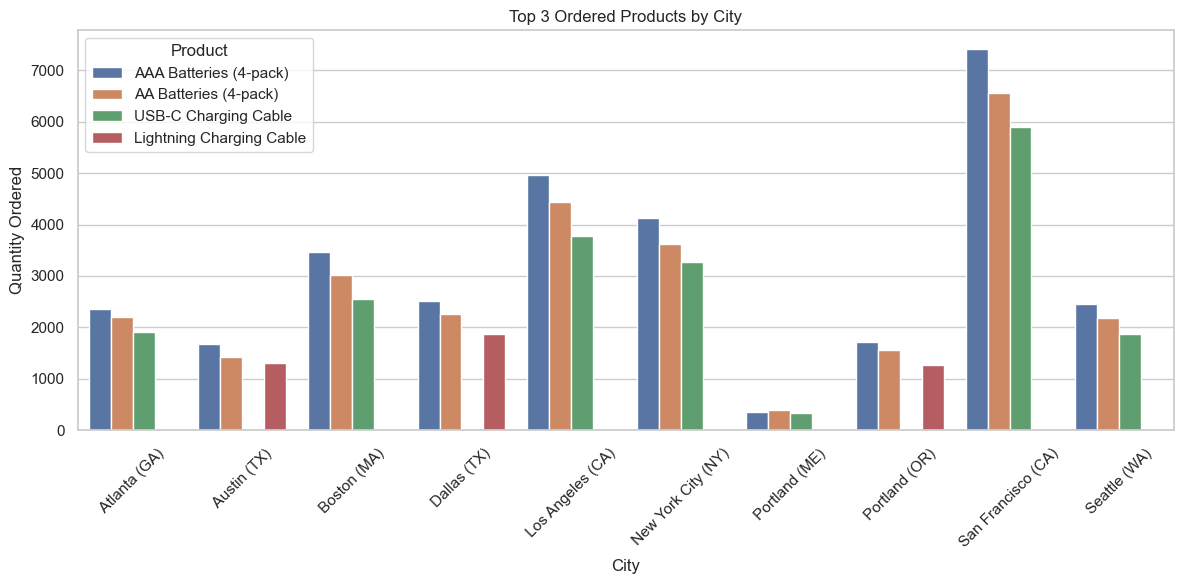

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(data=top3_products_by_city, x="City", y="Quantity Ordered", hue="Product")
plt.title("Top 3 Ordered Products by City")
plt.xticks(rotation=45)
plt.ylabel("Quantity Ordered")
plt.xlabel("City")
plt.legend(title="Product")
plt.tight_layout()
plt.show()

## Her şehirde en fazla sipariş alan ilk 3 ürünü barchart ile kıyaslı şekilde görebiliriz.

## ⬇ Her bir ürünün satış sayılarının şehir bazında incelemesini aşağıda görebiliriz.

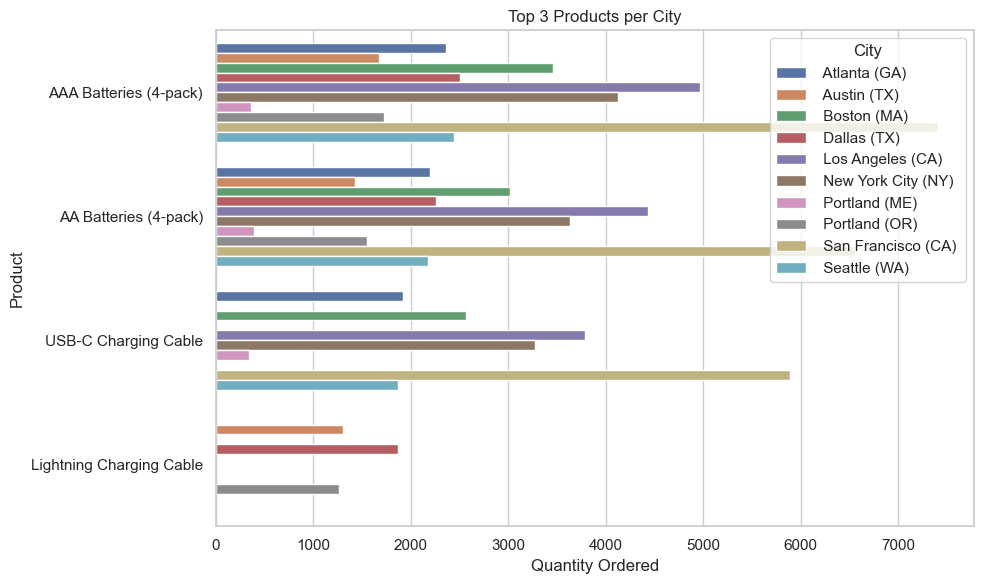

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(data=top3_products_by_city, y="Product", x="Quantity Ordered", hue="City")

plt.title("Top 3 Products per City")
plt.xlabel("Quantity Ordered")
plt.ylabel("Product")
plt.legend(title="City")
plt.tight_layout()
plt.show()



---

# 📊 Sonuçlar ve Bulgular

- **En çok satan ürünler**: AAA ve AA pil paketleri, şarj kabloları (USB-C, Lightning).  
- **En çok satış yapılan ay**: Aralık ayı, özellikle tatil dönemi satışları çok yüksektir.  
- **Şehir bazlı satışlar**: New York, Los Angeles ve San Francisco öne çıkan şehirlerdir.  
- **Fiyat ve adet ilişkisi**: Düşük fiyatlı ürünler (piller, kablolar) yüksek adetlerde satılmıştır.  

---

## 🚀 Gelecek Çalışmalar
- Müşteri segmentasyonu (coğrafi / satın alma alışkanlıklarına göre).  
- Tahmin modelleri ile gelecek yılın satış trendlerinin öngörülmesi.  
- Veri görselleştirmelerinin interaktif hale getirilmesi (Plotly / Dash).  
